<a href="https://colab.research.google.com/github/KhilavBhatt/Machine-Learning/blob/main/SVM_impl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import random

In [2]:
X, y = make_blobs(n_samples=200, centers=2) # prdefined sklearn method to generate rough data for practice here center may be 2 classes

In [3]:
X # X has 2 features lets say x0 and x1

array([[ 5.16270317, -7.65314245],
       [ 3.77736685, -6.65335908],
       [ 0.15814874, -3.51601949],
       [ 2.06135899, -4.40485721],
       [ 3.77570525, -7.80329297],
       [ 1.67212342, -2.50486539],
       [ 3.66941666, -8.77346807],
       [ 5.17069146, -5.7386677 ],
       [-0.69784251, -2.66659133],
       [ 4.04553419, -6.53257099],
       [ 4.35185552, -6.53365684],
       [ 2.22577334, -3.84973294],
       [ 0.78364102, -3.31612614],
       [ 3.54160277, -7.79450763],
       [ 5.38356937, -8.07123957],
       [ 1.66439057, -3.14288313],
       [ 0.76630401, -1.75746044],
       [ 2.34346671, -3.61890226],
       [ 1.20130224, -1.91692567],
       [ 0.54230186, -4.46472681],
       [-0.11792297, -3.36950389],
       [ 3.644526  , -6.63676468],
       [ 2.58709174, -2.61226722],
       [ 0.8317301 , -3.54021234],
       [ 2.48715374, -2.71984482],
       [ 3.55694535, -7.62739584],
       [ 0.72407227, -4.5780571 ],
       [ 4.03030064, -7.36506934],
       [ 3.1766553 ,

In [4]:
y

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1])

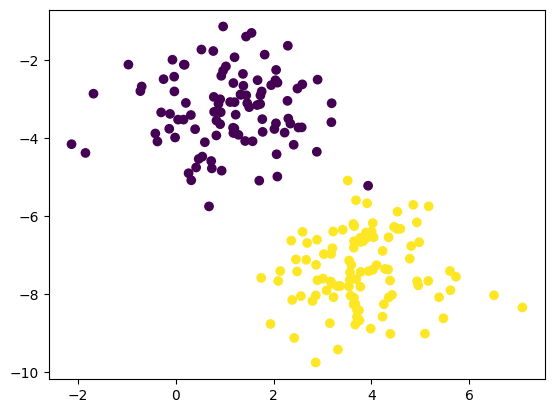

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
lr = 0.01
epochs= 100
w=0
b=0
y = np.where(y==0,1,-1) # we have changed y in +1 and -1 to match with our constraints
X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.20,random_state=42)

In [7]:
def svm_fit(X,y):
    n_sample, n_features = X.shape
    b=0
    lr = 0.01
    lagranges_ = 0.01
    w= np.zeros(n_features)# vector must be of the same shape of the input vectors

    #initial weights(w) and bias(b) is 0, and at every epoch we learn and update the w and b. Our goal is to get w and b such that
    #  for any new input vector v   w.v>=c if v is positive sample and w.v<=c if v is negative sample ( we have discuss this in classroom when I started mathematical intution of SVM)
    # It will try to find best hyperplane by running number of epochs
    for iteration in range(100):
        for i, Xi in enumerate(X):
            # yixiw-b≥1 (This is the constraint we have used to get the distance between support vectors x+ and x-(refer class notes.))
            if y[i] * (np.dot(Xi,w) - b) >= 1 :#This condition is for all correct classification (positive or negative)
                w =w - lr * (2 * lagranges_* w) # w = w + lr* (2λw - yixi)
            else:
                w =w - lr * (2 *lagranges_ * w - np.dot(Xi, y[i])) # w = w + lr* (2λw - yixi)
                b = b - lr * y[i] # b = b - lr* (yi)
       # plt.scatter(w[0],w[1])
        return w, b


In [8]:
def predict(X, w,b):
    pred = np.dot(X, w) - b
    result = [1 if val > 0 else -1 for val in pred] # returning in the form of -1 and 1
    return result

In [9]:
X.shape # where 200 is number of samples and 2 is number of features
X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.20,random_state=42)
w,b = svm_fit(X_train,y_train)
y_pred = predict(X_test,w,b)

In [10]:
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.8

In [11]:
#plt.scatter(X[:,0],X[:,1],c=y)

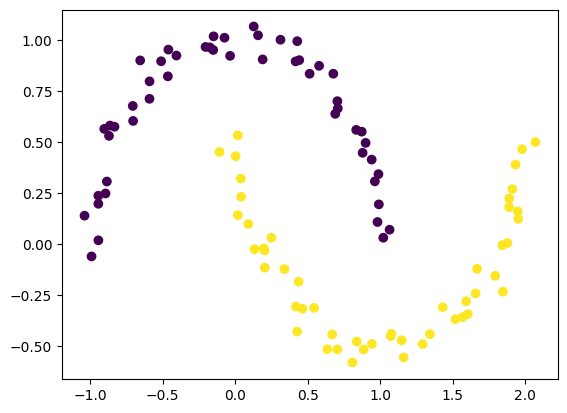

In [12]:
from sklearn.datasets import make_moons
X1, y1 = make_moons(n_samples=100, noise=.05)
plt.scatter(X1[:,0],X1[:,1],c=y1)

In [13]:
# Lets apply same linear classifier on non linear data. the accuracy is less due to non linearity
X1_train,X1_test, y1_train, y1_test= train_test_split(X1,y1,test_size=0.20,random_state=42)
w1,b1 = svm_fit(X1_train,y1_train)
y1_pred = predict(X1_test,w1,b1)
accuracy1 = accuracy_score(y1_pred, y1_test)
accuracy1

0.55

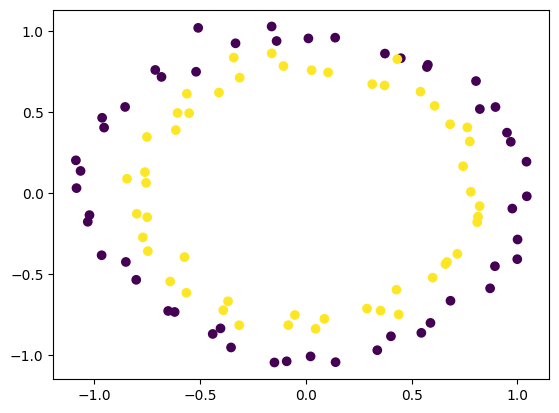

In [14]:
from sklearn.datasets import make_circles
X2,y2= make_circles(n_samples=100, noise=0.05)
plt.scatter(X2[:,0],X2[:,1],c=y2)

In [15]:
# Lets apply same linear classifier on circular data. the accuracy is less due to non linearity
X2_train,X2_test, y2_train, y2_test= train_test_split(X2,y2,test_size=0.20,random_state=42)
w2,b2 = svm_fit(X2_train,y2_train)
y2_pred = predict(X2_test,w2,b2)
accuracy2 = accuracy_score(y2_pred, y2_test)
accuracy2

0.6

**Exercise 1 : Plot the classifier line for all linear and non-linear data**

In [16]:
def plot_decision_boundary(X, y, w, b, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)

    # Create grid to evaluate model
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx = np.linspace(x_min, x_max, 200)

    # Decision boundary: w[0]*x + w[1]*y - b = 0 -> y = (b - w[0]*x) / w[1]
    if w[1] != 0:
        yy = (b + w[0]*xx) / w[1]
        plt.plot(xx, yy, 'k-', label='Decision boundary')
    else:
        # Vertical line if w[1] == 0
        plt.axvline(x=-b/w[0], color='k', label='Decision boundary')

    plt.title(title)
    plt.legend()
    plt.show()


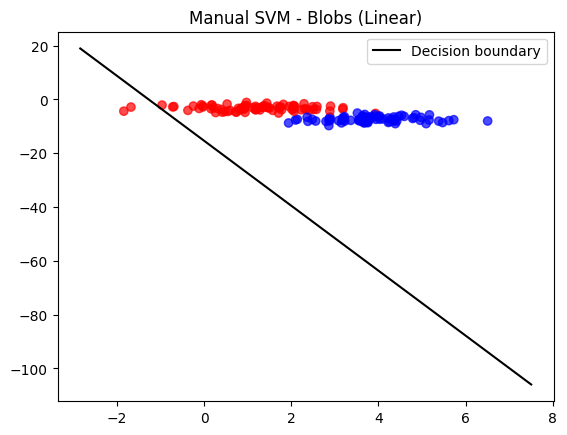

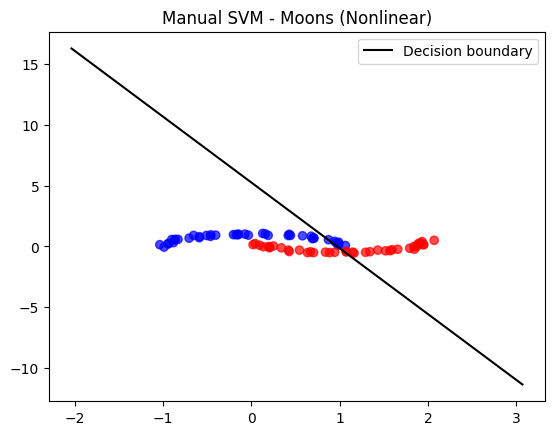

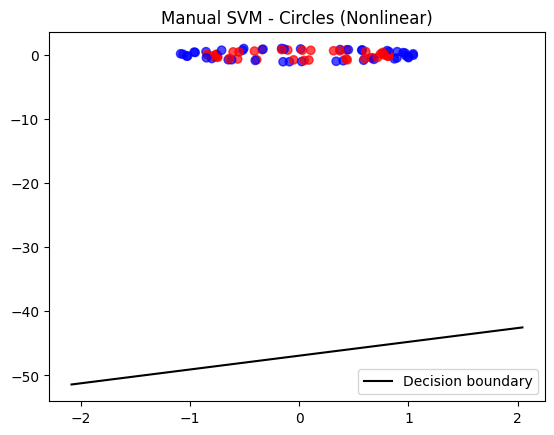

In [17]:
# For blobs (linear)
plot_decision_boundary(X_train, y_train, w, b, 'Manual SVM - Blobs (Linear)')

# For moons (nonlinear)
plot_decision_boundary(X1_train, y1_train, w1, b1, 'Manual SVM - Moons (Nonlinear)')

# For circles (nonlinear)
plot_decision_boundary(X2_train, y2_train, w2, b2, 'Manual SVM - Circles (Nonlinear)')


**Exercise 2 : Use the SVM classifier from SK Learn.**

In [18]:
from sklearn.svm import SVC

# For blobs (linear)
svm_sk = SVC(kernel='linear')
svm_sk.fit(X_train, y_train)
y_pred_sk = svm_sk.predict(X_test)
print(f"Sklearn Linear SVM accuracy on blobs: {accuracy_score(y_test, y_pred_sk):.2f}")

# For moons (nonlinear)
svm_sk1 = SVC(kernel='linear')
svm_sk1.fit(X1_train, y1_train)
y1_pred_sk = svm_sk1.predict(X1_test)
print(f"Sklearn Linear SVM accuracy on moons: {accuracy_score(y1_test, y1_pred_sk):.2f}")

# For circles (nonlinear)
svm_sk2 = SVC(kernel='linear')
svm_sk2.fit(X2_train, y2_train)
y2_pred_sk = svm_sk2.predict(X2_test)
print(f"Sklearn Linear SVM accuracy on circles: {accuracy_score(y2_test, y2_pred_sk):.2f}")


Sklearn Linear SVM accuracy on blobs: 1.00
Sklearn Linear SVM accuracy on moons: 0.75
Sklearn Linear SVM accuracy on circles: 0.40


**Exercise 3 : Use the SVM classifier from SK Learn with different kernal function which is capable to classify non-linear data**

Sklearn SVM with rbf kernel accuracy on moons: 0.95


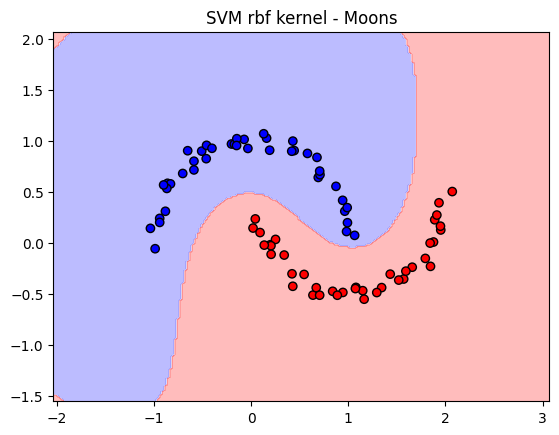

Sklearn SVM with poly kernel accuracy on moons: 0.95


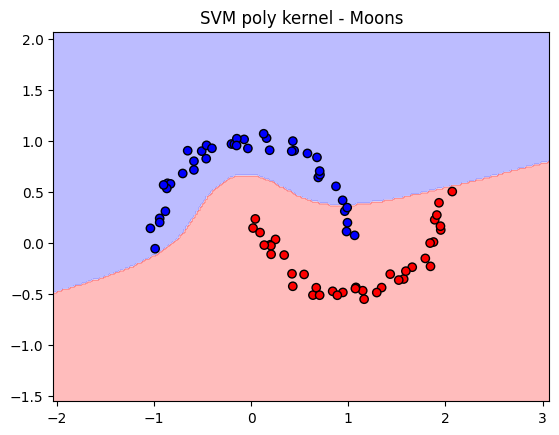

Sklearn SVM with rbf kernel accuracy on circles: 1.00


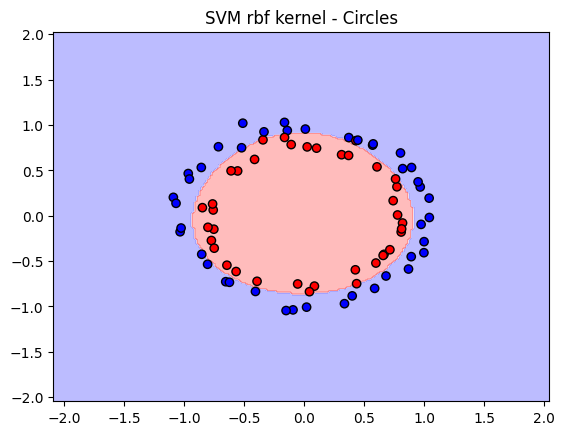

Sklearn SVM with poly kernel accuracy on circles: 0.30


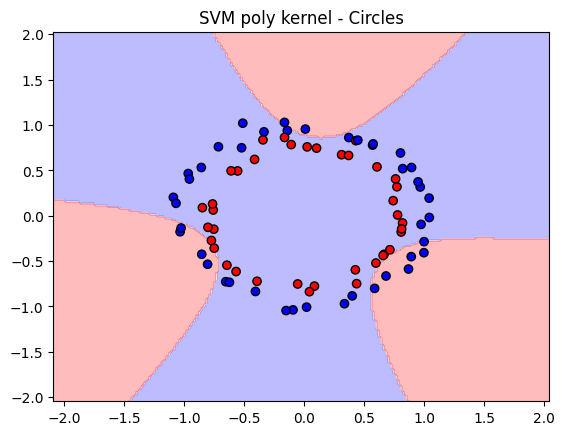

In [19]:
# Moons dataset
for kernel in ['rbf', 'poly']:
    svm_nonlin = SVC(kernel=kernel)
    svm_nonlin.fit(X1_train, y1_train)
    y1_pred_k = svm_nonlin.predict(X1_test)
    acc = accuracy_score(y1_test, y1_pred_k)
    print(f"Sklearn SVM with {kernel} kernel accuracy on moons: {acc:.2f}")

    # Optional: plot decision boundary for nonlinear kernel (using helper function below)
    def plot_sklearn_decision_boundary(clf, X, y, title):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                             np.linspace(y_min, y_max, 200))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
        plt.title(title)
        plt.show()

    plot_sklearn_decision_boundary(svm_nonlin, X1_train, y1_train, f'SVM {kernel} kernel - Moons')

# Circles dataset
for kernel in ['rbf', 'poly']:
    svm_nonlin = SVC(kernel=kernel)
    svm_nonlin.fit(X2_train, y2_train)
    y2_pred_k = svm_nonlin.predict(X2_test)
    acc = accuracy_score(y2_test, y2_pred_k)
    print(f"Sklearn SVM with {kernel} kernel accuracy on circles: {acc:.2f}")

    plot_sklearn_decision_boundary(svm_nonlin, X2_train, y2_train, f'SVM {kernel} kernel - Circles')
